<a href="https://colab.research.google.com/github/tataji/mlmodels/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from google.colab import drive



In [139]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
    import pandas as pd
    df = pd.read_csv('/content/drive/MyDrive/titanic/gender_submission.csv')

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split


In [142]:
train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")

In [143]:
print(train.describe(include="all"))
train.head()

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-144-f7cb98b03922>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"].dropna())


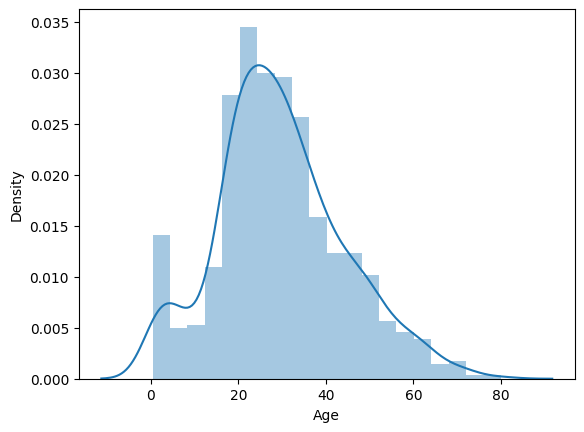

In [144]:
sns.distplot(train["Age"].dropna())
plt.show()

In [145]:
from sklearn.impute import SimpleImputer

In [146]:
X = train.drop(["Cabin", "Name", "Ticket", "Survived"], axis=1)
X["Sex"] = X["Sex"].replace(["male", "female"], [0, 1])
X["Embarked"] = X["Embarked"].replace(["S", "C", "Q"], [0, 1, 2])

<ipython-input-146-c0a47986e6f9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["Sex"] = X["Sex"].replace(["male", "female"], [0, 1])
<ipython-input-146-c0a47986e6f9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["Embarked"] = X["Embarked"].replace(["S", "C", "Q"], [0, 1, 2])


In [147]:
y = train["Survived"]

In [148]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [150]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7988826815642458
